### El siguiente código está basado en el Tutorial de *"Summary of Quantum Operations"* de **Qiskit**, disponible en https://github.com/Qiskit/qiskit-tutorials/tree/master/tutorials/circuits

### Para una correcta ejecución de este código, varias instrucciones debieron ser **modificadas y actualizadas** a la versión 1.3 de **Qiskit** (2025). 


In [1]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)

from platform import python_version
print('Python Version:', python_version())

Qiskit Version: 1.3.2
IBM RunTime Version: 0.35.0
Qiskit_Aer Version: 0.16.1
Python Version: 3.13.1


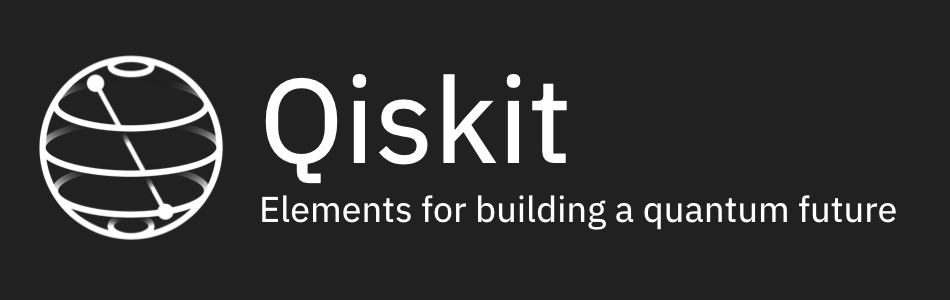

# Summary of Quantum Operations 

 In this section we will go into the different operations that are available in Qiskit Terra. These are:
- Single-qubit quantum gates
- Multi-qubit quantum gates
- Measurements
- Reset
- Conditionals
- State initialization

In [2]:
# Useful additional packages 
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from math import pi

In [3]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister #, execute
# from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity

# from qiskit import BasicAer
# backend = BasicAer.get_backend('unitary_simulator')

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicSimulator

from qiskit.quantum_info import Pauli
from qiskit.quantum_info import SparsePauliOp
from qiskit.quantum_info import Operator, Statevector, DensityMatrix

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit.visualization import plot_distribution, plot_histogram, array_to_latex

In [5]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

## Single Qubit Quantum states <a name="single_states"/>

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the bit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note, due to the conservation of probability $|\alpha|^2+ |\beta|^2 = 1$ and since global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$ we only require two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this, it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate which acts on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is 

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b 
\end{pmatrix}
$$ 

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving 

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2) 
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary.

## Single-Qubit Gates <a name="single_gates"/>

The single-qubit gates available are:
- u gates
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates 

We have provided a backend: `unitary_simulator` to allow you to calculate the unitary matrices. 

In [6]:
q = QuantumRegister(1, name='q')

## U gates
### U3 gate:

In Qiskit we give you access to the general unitary using the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda) 
$$


In [7]:
qc = QuantumCircuit(q)
qc.u(pi/2,pi/2,pi/2,q)

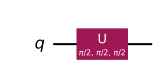

In [8]:
qc.draw('mpl')
# qc.draw('mpl', style='iqx')

In [9]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [10]:
unitary = Operator(qc)

unitary_matrix = unitary.to_matrix()
unitary_matrix.round(decimals=3)

array([[ 0.707+0.j   , -0.   -0.707j],
       [ 0.   +0.707j, -0.707+0.j   ]])

In [11]:

array_to_latex(unitary, prefix="\\text{Gate U(pi/2,pi/2,pi/2) = }\n")

<IPython.core.display.Latex object>

------------

### U2 Gate:

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ gate has the matrix form

$$
u2(\phi, \lambda) = 
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions.

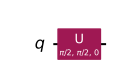

In [12]:
qc = QuantumCircuit(q)
qc.u(pi/2,pi/2,0,q)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Ugate.png')

In [13]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [14]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate U(pi/2,pi/2,0) = }\n")

<IPython.core.display.Latex object>

-----

### U1 gate:

The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is useful as it allows us to apply a quantum phase.

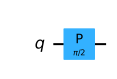

In [15]:
qc = QuantumCircuit(q)

# qc.u(0, 0, pi/2, q)
qc.p(pi/2, q)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Pgate.png')

In [16]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [17]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate U(0, 0, pi/2) = }\n")

<IPython.core.display.Latex object>

### Identity gate

The identity gate is $Id = u0(1)$.

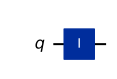

In [18]:
qc = QuantumCircuit(q)
qc.id(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Igate.png')

In [19]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [20]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate I = }\n")

<IPython.core.display.Latex object>

--------

### Pauli gates

#### $X$: bit-flip gate

The bit-flip gate $X$ is defined as:

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}= u3(\pi,0,\pi)
$$

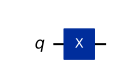

In [21]:
qc = QuantumCircuit(q)
qc.x(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Xgate.png')

In [22]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [23]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate X = }\n")

<IPython.core.display.Latex object>

#### $Y$: bit- and phase-flip gate

The $Y$ gate is defined as:

$$
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}=u3(\pi,\pi/2,\pi/2)
$$

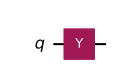

In [24]:
qc = QuantumCircuit(q)
qc.y(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Ygate.png')

In [25]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [26]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate Y = }\n")

<IPython.core.display.Latex object>

#### $Z$: phase-flip gate

The phase-flip gate $Z$ is defined as:

$$
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}=u1(\pi)
$$

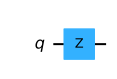

In [27]:
qc = QuantumCircuit(q)
qc.z(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Zgate.png')

In [28]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [29]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate Z = }\n")

<IPython.core.display.Latex object>

### Clifford gates

#### Hadamard gate

$$
H = 
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}= u2(0,\pi)
$$

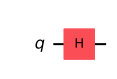

In [30]:
qc = QuantumCircuit(q)
qc.h(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Hgate.png')

In [31]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [32]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate H = }\n")

<IPython.core.display.Latex object>

#### $S$ (or, $\sqrt{Z}$ phase) gate

$$
S = 
\begin{pmatrix}
1 & 0\\
0 & i
\end{pmatrix}= u1(\pi/2)
$$

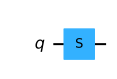

In [33]:
qc = QuantumCircuit(q)
qc.s(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Sgate.png')

In [34]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [35]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{S Gate = }\n")

<IPython.core.display.Latex object>

#### $S^{\dagger}$ (or, conjugate of $\sqrt{Z}$ phase) gate

$$
S^{\dagger} = 
\begin{pmatrix}
1 & 0\\
0 & -i
\end{pmatrix}= u1(-\pi/2)
$$


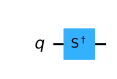

In [36]:
qc = QuantumCircuit(q)
qc.sdg(q)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='SdgGate.png')

In [37]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [38]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate } S^{\\dagger} =\n")


<IPython.core.display.Latex object>

### $C3$ gates
#### $T$ (or, $\sqrt{S}$ phase) gate

$$
T = 
\begin{pmatrix}
1 & 0\\
0 & e^{i \pi/4}
\end{pmatrix}= u1(\pi/4) 
$$

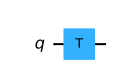

In [39]:
qc = QuantumCircuit(q)
qc.t(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Tgate.png')

In [40]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [41]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate T = }\n")

<IPython.core.display.Latex object>

#### $T^{\dagger}$ (or, conjugate of $\sqrt{S}$ phase) gate

$$
T^{\dagger} =  
\begin{pmatrix}
1 & 0\\
0 & e^{-i \pi/4}
\end{pmatrix}= u1(-pi/4)
$$

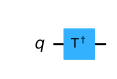

In [42]:
qc = QuantumCircuit(q)
qc.tdg(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='TdgGate.png')

In [43]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [44]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate } T^{\\dagger} = \n")

<IPython.core.display.Latex object>

### Standard Rotations

The standard rotation gates are those that define rotations around the Paulis $P=\{X,Y,Z\}$. They are defined as 

$$ R_P(\theta) = \exp(-i \theta P/2) = \cos(\theta/2)I -i \sin(\theta/2)P$$

#### Rotation around X-axis

$$
R_x(\theta) = 
\begin{pmatrix}
\cos(\theta/2) & -i\sin(\theta/2)\\
-i\sin(\theta/2) & \cos(\theta/2)
\end{pmatrix} = u3(\theta, -\pi/2,\pi/2)
$$

In [45]:
from qiskit.visualization import array_to_latex

qc = QuantumCircuit(q)
qc.rx(pi/2,0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='RXGate.png')

unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{Gate Rx(pi/2) = }\n")

<IPython.core.display.Latex object>

In [46]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [47]:
# unitary_matrix = Operator(qc).to_matrix()
# unitary_matrix.round(decimals=3)

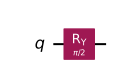

In [48]:
qc = QuantumCircuit(q)
qc.ry(pi/2,0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='RYGate.png')

In [49]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [50]:
# unitary_matrix = Operator(qc).to_matrix()
# unitary_matrix.round(decimals=3)

unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{Gate Ry(pi/2) = }\n")

<IPython.core.display.Latex object>

#### Rotation around Z-axis

$$
R_z(\phi) = 
\begin{pmatrix}
e^{-i \phi/2} & 0 \\
0 & e^{i \phi/2}
\end{pmatrix}\equiv u1(\phi)
$$

Note that here we have used an equivalent as it is different to u1 by a global phase $e^{-i \phi/2}$.

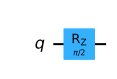

In [51]:
qc = QuantumCircuit(q)
qc.rz(pi/2,0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='RZGate.png')

In [52]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [53]:
# unitary_matrix = Operator(qc).to_matrix()
# unitary_matrix.round(decimals=3)

unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{Gate Rz(pi/2) = }\n")

<IPython.core.display.Latex object>

Note this is different due only to a global phase.

## Demostración de Conjugación de Clifford

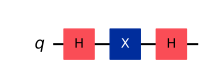

In [54]:
qc = QuantumCircuit(q)
qc.h(0)
qc.x(0)
qc.h(0)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='HXHConjugating.png')

In [55]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{HXH = }\n")

<IPython.core.display.Latex object>

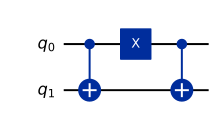

In [56]:
q = QuantumRegister(2, name='q')
qc = QuantumCircuit(q)

qc.cx(0,1)
qc.x(0)
qc.cx(0,1)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='CX-X-CX_Conjugate.png')

In [57]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{CX (X x I) CX = }\n")

<IPython.core.display.Latex object>

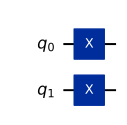

In [58]:
qc = QuantumCircuit(q)
qc.x(0)
qc.x(1)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='X-X.png')

In [59]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{X x X = }\n")

<IPython.core.display.Latex object>

## Multi-Qubit Gates <a name="multi_gates"/>

### Mathematical Preliminaries

The space of a quantum computer grows exponentially with the number of qubits. For $n$ qubits the complex vector space has dimension $d=2^n$. To describe states of a multi-qubit system, the tensor product is used to "glue together" operators and basis vectors.

Let's start by considering a 2-qubit system. Given two operators $A$ and $B$ that each act on one qubit, the joint operator $A \otimes B$ acting on two qubits is

$$\begin{equation}
	A\otimes B = 
	\begin{pmatrix} 
		A_{00} \begin{pmatrix} 
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01} 	\begin{pmatrix} 
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix} 
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11} 	\begin{pmatrix} 
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix},						
\end{equation}$$

where $A_{jk}$ and $B_{lm}$ are the matrix elements of $A$ and $B$, respectively.

Analogously, the basis vectors for the 2-qubit system are formed using the tensor product of basis vectors for a single qubit:
$$\begin{equation}\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix} 
		1 \begin{pmatrix} 
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix} 
			1  \\
			0 
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix} 
	1 \begin{pmatrix} 
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
\end{equation}$$
    
$$\begin{equation}\begin{split}\left|{10}\right\rangle = \begin{pmatrix} 
	0\begin{pmatrix} 
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix} 
	1 \\
	0 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix} 
	0 \begin{pmatrix} 
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix} 
	0  \\
	1 
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
\end{equation}.$$

Note we've introduced a shorthand for the tensor product of basis vectors, wherein $\left|0\right\rangle \otimes \left|0\right\rangle$ is written as $\left|00\right\rangle$. The state of an $n$-qubit system can be described using the $n$-fold tensor product of single-qubit basis vectors. Notice that the basis vectors for a 2-qubit system are 4-dimensional; in general, the basis vectors of an $n$-qubit sytsem are $2^{n}$-dimensional, as noted earlier.

### Basis vector ordering in Qiskit

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state $\left|0\right\rangle$ and second is in state $\left|1\right\rangle$, their joint state would be $\left|01\right\rangle$. Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as $\left|10\right\rangle$. Importantly, *this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit*, as discussed below.

The representation used in Qiskit enumerates the basis vectors in increasing order of the integers they represent. For instance, the basis vectors for a 2-qubit system would be ordered as $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, and $\left|11\right\rangle$. Thinking of the basis vectors as bit strings, they encode the integers 0,1,2 and 3, respectively.


### Controlled operations on qubits

A common multi-qubit gate involves the application of a gate to one qubit, conditioned on the state of another qubit. For instance, we might want to flip the state of the second qubit when the first qubit is in $\left|0\right\rangle$. Such gates are known as _controlled gates_. The standard multi-qubit gates consist of two-qubit gates and three-qubit gates. The two-qubit gates are:
- controlled Pauli gates
- controlled Hadamard gate
- controlled rotation gates
- controlled phase gate
- controlled u3 gate
- swap gate

The three-qubit gates are: 
- Toffoli gate 
- Fredkin gate

## Two-qubit gates <a name="two_gates"/>

Most of the two-qubit gates are of the controlled type (the SWAP gate being the exception). In general, a controlled two-qubit gate $C_{U}$ acts to apply the single-qubit unitary $U$ to the second qubit when the state of the first qubit is in $\left|1\right\rangle$. Suppose $U$ has a matrix representation

$$U = \begin{pmatrix} u_{00} & u_{01} \\ u_{10} & u_{11}\end{pmatrix}.$$

We can work out the action of $C_{U}$ as follows. Recall that the basis vectors for a two-qubit system are ordered as $\left|00\right\rangle, \left|01\right\rangle, \left|10\right\rangle, \left|11\right\rangle$. Suppose the **control qubit** is **qubit 0** (which, according to Qiskit's convention, is one the _right-hand_ side of the tensor product). If the control qubit is in $\left|1\right\rangle$, $U$ should be applied to the **target** (qubit 1, on the _left-hand_ side of the tensor product). Therefore, under the action of $C_{U}$, the basis vectors are transformed according to

$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{U\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
\end{align*}.$$

In matrix form, the action of $C_{U}$ is

$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0 & 0 \\
	0 & u_{00} & 0 & u_{01} \\
	0 & 0 & 1 & 0 \\
	0 & u_{10} &0 & u_{11}
		\end{pmatrix}.
\end{equation}$$

To work out these matrix elements, let

$$C_{(jk), (lm)} = \left(\underset{\text{qubit}~1}{\left\langle j \right|} \otimes \underset{\text{qubit}~0}{\left\langle k \right|}\right) C_{U} \left(\underset{\text{qubit}~1}{\left| l \right\rangle} \otimes \underset{\text{qubit}~0}{\left| k \right\rangle}\right),$$

compute the action of $C_{U}$ (given above), and compute the inner products.

As shown in the examples below, this operation is implemented in Qiskit as `cU(q[0],q[1])`.


If **qubit 1 is the control and qubit 0 is the target**, then the basis vectors are transformed according to
$$\begin{align*}
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|0\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|0\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|0\right\rangle}\\
C_{U}: \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{\left|1\right\rangle} &\rightarrow \underset{\text{qubit}~1}{\left|1\right\rangle}\otimes \underset{\text{qubit}~0}{U\left|1\right\rangle}\\
\end{align*},$$


which implies the matrix form of $C_{U}$ is
$$\begin{equation}
	C_U = \begin{pmatrix}
	1 & 0 & 0  & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & u_{00} & u_{01} \\
	0 & 0 & u_{10} & u_{11}
		\end{pmatrix}.
\end{equation}$$

In [60]:
q = QuantumRegister(2, name='q')

### Controlled Pauli Gates

#### Controlled-X (or, controlled-NOT) gate
The controlled-not gate flips the `target` qubit when the control qubit is in the state $\left|1\right\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}. 
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}. 
$$



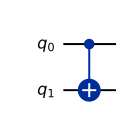

In [61]:
qc = QuantumCircuit(q)
qc.cx(q[0],q[1])

qc.draw('mpl')

In [62]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [63]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate CX = CNOT = }\n")

<IPython.core.display.Latex object>

#### Controlled $Y$ gate

Apply the $Y$ gate to the target qubit if the control qubit is the MSB

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & i & 0
\end{pmatrix},
$$

or when the LSB is the control

$$
C_Y = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & -i\\
0 & 0 & 1 & 0\\
0 & i & 0 & 0
\end{pmatrix}.
$$

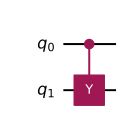

In [64]:
qc = QuantumCircuit(q)
qc.cy(q[0],q[1])

qc.draw('mpl')

In [65]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [66]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate CY = }\n")

<IPython.core.display.Latex object>

#### Controlled $Z$ (or, controlled Phase) gate

Similarly, the controlled Z gate flips the phase of the target qubit if the control qubit is $\left|1\right\rangle$. The matrix looks the same regardless of whether the MSB or LSB is the control qubit:

$$
C_Z = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}
$$


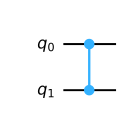

In [67]:
qc = QuantumCircuit(q)
qc.cz(0,1)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='CZgate.png')

In [68]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{Gate CZ = }\n")

<IPython.core.display.Latex object>

### Controlled Hadamard gate

Apply $H$ gate to the target qubit if the control qubit is $\left|1\right\rangle$. Below is the case where the control is the LSB qubit.

$$
C_H = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}}\\
0 & 0 & 1 & 0\\
0 & \frac{1}{\sqrt{2}}  & 0& -\frac{1}{\sqrt{2}}
\end{pmatrix}
$$

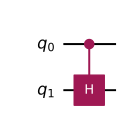

In [69]:
qc = QuantumCircuit(q)
qc.ch(q[0],q[1])

qc.draw('mpl')

In [70]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [71]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate CH = }\n")

<IPython.core.display.Latex object>

### Controlled rotation gates

#### Controlled rotation around Z-axis

Perform rotation around Z-axis on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$.

$$
C_{Rz}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i\lambda/2} & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda/2}
\end{pmatrix}
$$

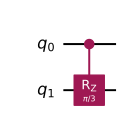

In [72]:
qc = QuantumCircuit(q)
theta = pi/3
qc.crz(theta,0,1)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='CRZ.png')

In [73]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [74]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate CRZ = }\n")

<IPython.core.display.Latex object>

### Controlled phase rotation

Perform a phase rotation if both qubits are in the $\left|11\right\rangle$ state. The matrix looks the same regardless of whether the MSB or LSB is the control qubit.

$$
C_{u1}(\lambda) = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & e^{i\lambda}
\end{pmatrix}
$$

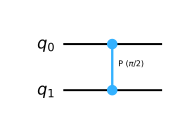

In [75]:
qc = QuantumCircuit(q)
qc.cp(pi/2,q[0], q[1])

qc.draw('mpl')

In [76]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [77]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate CP = }\n")

<IPython.core.display.Latex object>

### Controlled $u3$ rotation

Perform controlled-$u3$ rotation on the target qubit if the control qubit (here LSB) is $\left|1\right\rangle$. 

$$
C_{u3}(\theta, \phi, \lambda) \equiv 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & e^{-i(\phi+\lambda)/2}\cos(\theta/2) & 0 & -e^{-i(\phi-\lambda)/2}\sin(\theta/2)\\
0 & 0 & 1 & 0\\
0 & e^{i(\phi-\lambda)/2}\sin(\theta/2) & 0 & e^{i(\phi+\lambda)/2}\cos(\theta/2)
\end{pmatrix}.
$$

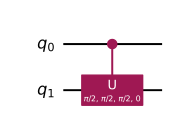

In [78]:
qc = QuantumCircuit(q)
qc.cu(pi/2, pi/2, pi/2, 0, q[0], q[1])

qc.draw('mpl')

In [79]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [80]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate CU(pi/2, pi/2, pi/2) = }\n")

<IPython.core.display.Latex object>

### SWAP gate

The SWAP gate exchanges the two qubits. It transforms the basis vectors as

$$\left|00\right\rangle \rightarrow \left|00\right\rangle~,~\left|01\right\rangle \rightarrow \left|10\right\rangle~,~\left|10\right\rangle \rightarrow \left|01\right\rangle~,~\left|11\right\rangle \rightarrow \left|11\right\rangle,$$

which gives a matrix representation of the form

$$
\mathrm{SWAP} = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix}.
$$

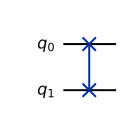

In [81]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])

qc.draw('mpl')

In [82]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [83]:
unitary = Operator(qc)

# unitary_matrix = unitary.to_matrix()
# unitary_matrix.round(decimals=3)

array_to_latex(unitary, prefix="\\text{Gate SWAP = }\n")

<IPython.core.display.Latex object>

## Three-qubit gates <a name="three_gates"/>


There are two commonly-used three-qubit gates. For three qubits, the basis vectors are ordered as

$$\left|000\right\rangle, \left|001\right\rangle, \left|010\right\rangle, \left|011\right\rangle, \left|100\right\rangle, \left|101\right\rangle, \left|110\right\rangle, \left|111\right\rangle,$$

which, as bitstrings, represent the integers $0,1,2,\cdots, 7$. Again, Qiskit uses a representation in which the first qubit is on the right-most side of the tensor product and the third qubit is on the left-most side:

$$\left|abc\right\rangle : \underset{\text{qubit 2}}{\left|a\right\rangle}\otimes \underset{\text{qubit 1}}{\left|b\right\rangle}\otimes \underset{\text{qubit 0}}{\left|c\right\rangle}.$$

### Toffoli gate ($ccx$ gate)

The [Toffoli gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Toffoli_(CCNOT)_gate) flips the third qubit if the first two qubits (LSB) are both $\left|1\right\rangle$:

$$\left|abc\right\rangle \rightarrow \left|bc\oplus a\right\rangle \otimes \left|b\right\rangle \otimes \left|c\right\rangle.$$

In matrix form, the Toffoli gate is
$$
C_{CX} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{pmatrix}.
$$

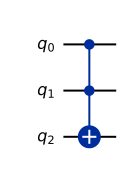

In [84]:
q = QuantumRegister(3, name='q')

qc = QuantumCircuit(q)
qc.ccx(0, 1, 2)

qc.draw('mpl')
# qc.draw('mpl', style='iqx', filename='Toffoli.png')

In [85]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{Toffoli = }\n")

<IPython.core.display.Latex object>

### Controlled swap gate (Fredkin Gate)

The [Fredkin gate](https://en.wikipedia.org/wiki/Quantum_logic_gate#Fredkin_(CSWAP)_gate), or the *controlled swap gate*, exchanges the second and third qubits if the first qubit (LSB) is $\left|1\right\rangle$:

$$ \left|abc\right\rangle \rightarrow \begin{cases} \left|bac\right\rangle~~\text{if}~c=1 \cr \left|abc\right\rangle~~\text{if}~c=0 \end{cases}.$$

In matrix form, the Fredkin gate is

$$
C_{\mathrm{SWAP}} = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}.
$$

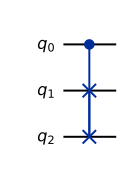

In [86]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])

qc.draw('mpl')

In [87]:
# job = execute(qc, backend)
# job.result().get_unitary(qc, decimals=3)

In [88]:
unitary = Operator(qc)
array_to_latex(unitary, prefix="\\text{Gate CSWAP = }\n")

<IPython.core.display.Latex object>

## Non-unitary operations <a name="non_unitary"/>

Now that we have gone through all the unitary operations in quantum circuits, we also have access to non-unitary operations. These include measurements, reset of qubits, and classical conditional operations.

In [89]:
q = QuantumRegister(1, name='q')
c = ClassicalRegister(1, name='c')

### Measurements

We don't have access to all the information when we make a measurement in a quantum computer. The quantum state is projected onto the standard basis. Below are two examples showing a circuit that is prepared in a basis state and the quantum computer prepared in a superposition state.

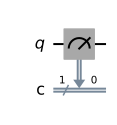

In [90]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)

qc.draw('mpl')

In [91]:
# backend = BasicAer.get_backend('qasm_simulator')
# job = execute(qc, backend, shots=1024)
# job.result().get_counts(qc)

In [92]:
sim_backend = BasicSimulator()

job = sim_backend.run(transpile(qc, sim_backend), shots=1024)
job.result().get_counts(qc)

{'0': 1024}

 The simulator predicts that 100 percent of the time the classical register returns 0. 

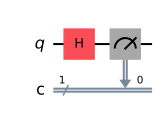

In [93]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)

qc.draw('mpl')

In [94]:
# job = execute(qc, backend, shots=1024)
# job.result().get_counts(qc)

In [95]:
job = sim_backend.run(transpile(qc, sim_backend), shots=1024)
counts = job.result().get_counts(qc)

print(counts)

{'0': 534, '1': 490}


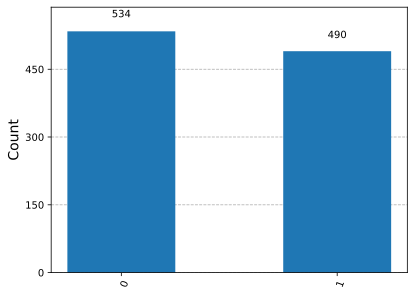

In [96]:
plot_histogram(counts)

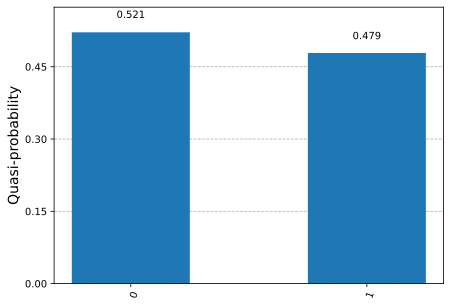

In [97]:
plot_distribution(counts)

 The simulator predicts that 50 percent of the time the classical register returns 0 or 1. 

### Reset
It is also possible to `reset` qubits to the $\left|0\right\rangle$ state in the middle of computation. Note that `reset` is not a Gate operation, since it is irreversible.

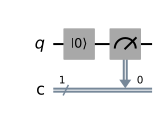

In [98]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)

qc.draw('mpl')

In [99]:
# job = execute(qc, backend, shots=1024)
# job.result().get_counts(qc)

In [100]:
job = sim_backend.run(transpile(qc, sim_backend), shots=1024)
job.result().get_counts(qc)

{'0': 1024}

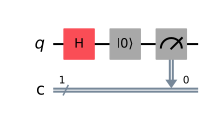

In [101]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)

qc.draw('mpl')

In [102]:
# job = execute(qc, backend, shots=1024)
# job.result().get_counts(qc)

In [103]:
job = sim_backend.run(transpile(qc, sim_backend), shots=1024)
job.result().get_counts(qc)

{'0': 1024}

Here we see that for both of these circuits the simulator always predicts that the output is 100 percent in the 0 state.

### Conditional operations
It is also possible to do operations conditioned on the state of the classical register

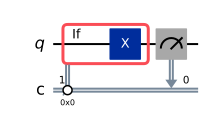

In [104]:
qc = QuantumCircuit(q, c)

with qc.if_test((c, 0)):
        qc.x(q[0])
qc.measure(q,c)

qc.draw('mpl')

Here the classical bit always takes the value 0 so the qubit state is always flipped. 

In [105]:
# job = execute(qc, backend, shots=1024)
# job.result().get_counts(qc)

In [106]:
simulator = AerSimulator()

job = simulator.run(transpile(qc, simulator), shots=1024)
job.result().get_counts(qc)

{'1': 1024}

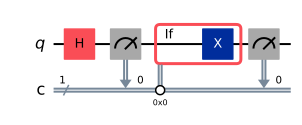

In [107]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)

with qc.if_test((c, 0)):
        qc.x(q[0])
qc.measure(q,c)

qc.draw('mpl')

In [108]:
# job = execute(qc, backend, shots=1024)
# job.result().get_counts(qc)

In [109]:
job = simulator.run(transpile(qc, simulator), shots=1024)
job.result().get_counts(qc)

{'1': 1024}

Here the classical bit by the first measurement is random but the conditional operation results in the qubit being deterministically put into $\left|1\right\rangle$.

## Arbitrary initialization <a name="initialization"/>
What if we want to initialize a qubit register to an arbitrary state? An arbitrary state for $n$ qubits may be specified by a vector of $2^n$ amplitudes, where the sum of amplitude-norms-squared equals 1. For example, the following three-qubit state can be prepared:

$$\left|\psi\right\rangle = \frac{i}{4}\left|000\right\rangle + \frac{1}{\sqrt{8}}\left|001\right\rangle + \frac{1+i}{4}\left|010\right\rangle + \frac{1+2i}{\sqrt{8}}\left|101\right\rangle + \frac{1}{4}\left|110\right\rangle$$

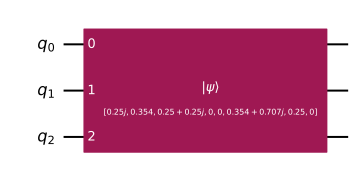

In [110]:
# Initializing a three-qubit quantum state
import math
desired_vector = [
    1 / math.sqrt(16) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / math.sqrt(8) * complex(1, 2),
    1 / math.sqrt(16) * complex(1, 0),
    0]

q = QuantumRegister(3, name='q')
qc = QuantumCircuit(q)
qc.initialize(desired_vector, [q[0],q[1],q[2]])

qc.draw(output='mpl')

In [111]:
# backend = BasicAer.get_backend('statevector_simulator')
# job = execute(qc, backend)
# qc_state = job.result().get_statevector(qc)
# qc_state 

In [112]:
qc_state = Statevector(qc)
array_to_latex(qc_state, prefix="\\ket{\\psi}_{statevector} = \n")

<IPython.core.display.Latex object>

[Fidelity](https://en.wikipedia.org/wiki/Fidelity_of_quantum_states) is useful to check whether two states are the same or not.
For quantum (pure) states $\left|\psi_1\right\rangle$ and $\left|\psi_2\right\rangle$, the fidelity is

$$
F\left(\left|\psi_1\right\rangle,\left|\psi_2\right\rangle\right) = \left|\left\langle\psi_1\middle|\psi_2\right\rangle\right|^2.
$$

The fidelity is equal to $1$ if and only if two states are equal.

In [113]:
state_fidelity(desired_vector,qc_state)

0.9999999999999996

#### Further details:

How does the desired state get generated behind the scenes? There are multiple methods for doing this. Qiskit uses a [method proposed by Shende et al](https://arxiv.org/abs/quant-ph/0406176). Here, the idea is to assume the quantum register to have started from our desired state, and construct a circuit that takes it to the $\left|00..0\right\rangle$ state. The initialization circuit is then the reverse of such circuit.

To take an arbitrary quantum state to the zero state in the computational basis, we perform an iterative procedure that disentangles qubits from the register one-by-one. We know that any arbitrary single-qubit state $\left|\rho\right\rangle$ can be taken to the $\left|0\right\rangle$ state using a $\phi$-degree rotation about the Z axis followed by a $\theta$-degree rotation about the Y axis:

$$R_y(-\theta)R_z(-\phi)\left|\rho\right\rangle = re^{it}\left|0\right\rangle$$

Since now we are dealing with $n$ qubits instead of just 1, we must factorize the state vector to separate the Least Significant Bit (LSB):

$$\begin{align*}
 \left|\psi\right\rangle =& \alpha_{0_0}\left|00..00\right\rangle + \alpha_{0_1}\left|00..01\right\rangle + \alpha_{1_0}\left|00..10\right\rangle + \alpha_{1_1}\left|00..11\right\rangle + ... \\&+ \alpha_{(2^{n-1}-1)_0}\left|11..10\right\rangle + \alpha_{(2^{n-1}-1)_1}\left|11..11\right\rangle \\
=& \left|00..0\right\rangle (\alpha_{0_0}\left|0\right\rangle + \alpha_{0_1}\left|1\right\rangle) + \left|00..1\right\rangle (\alpha_{1_0}\left|0\right\rangle + \alpha_{1_1}\left|1\right\rangle) + ... \\&+ \left|11..1\right\rangle (\alpha_{(2^{n-1}-1)_0}(\left|0\right\rangle + \alpha_{(2^{n-1}-1)_1}\left|1\right\rangle) \\
=& \left|00..0\right\rangle\left|\rho_0\right\rangle + \left|00..1\right\rangle\left|\rho_1\right\rangle + ... + \left|11..1\right\rangle\left|\rho_{2^{n-1}-1}\right\rangle
\end{align*}$$

Now each of the single-qubit states $\left|\rho_0\right\rangle, ..., \left|\rho_{2^{n-1}-1}\right\rangle$ can be taken to $\left|0\right\rangle$ by finding appropriate $\phi$ and $\theta$ angles per the equation above. Doing this simultaneously on all states amounts to the following unitary, which disentangles the LSB:

$$U = \begin{pmatrix} 
R_{y}(-\theta_0)R_{z}(-\phi_0) & & & &\\  
& R_{y}(-\theta_1)R_{z}(-\phi_1) & & &\\
& . & & &\\
& & . & &\\
& & & & R_y(-\theta_{2^{n-1}-1})R_z(-\phi_{2^{n-1}-1})
\end{pmatrix} $$

Hence,

$$U\left|\psi\right\rangle = \begin{pmatrix} r_0e^{it_0}\\ r_1e^{it_1}\\ . \\ . \\ r_{2^{n-1}-1}e^{it_{2^{n-1}-1}} \end{pmatrix}\otimes\left|0\right\rangle$$


U can be implemented as a "quantum multiplexor" gate, since it is a block diagonal matrix. In the quantum multiplexor formalism, a block diagonal matrix of size $2^n \times 2^n$, and consisting of $2^s$ blocks, is equivalent to a multiplexor with $s$ select qubits and $n-s$ data qubits. Depending on the state of the select qubits, the corresponding blocks are applied to the data qubits. A multiplexor of this kind can be implemented after recursive decomposition to primitive gates of cx, rz and ry.

In [114]:
# import qiskit.tools.jupyter
# %qiskit_version_table
# %qiskit_copyright

In [115]:
from qiskit import __version__ as qiskit_version
from qiskit_ibm_runtime import __version__ as runtime_version
from qiskit_aer import __version__ as aer_version
from IPython.display import display, Math
from platform import python_version

print('Qiskit Version:', qiskit_version)
print('IBM RunTime Version:', runtime_version)
print('Qiskit_Aer Version:', aer_version)
print('Python Version:', python_version())
print('2025 ©')

Qiskit Version: 1.3.2
IBM RunTime Version: 0.35.0
Qiskit_Aer Version: 0.16.1
Python Version: 3.13.1
2025 ©
